In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
mvid = pd.read_csv('/content/MVID_101001_171001.txt')
sber = pd.read_csv('/content/SBER_101001_171001.txt')

mvid.head()

,<TICKER>,<PER>,<DATE>,<TIME>,<CLOSE>,<VOL>
0,MVID,D,20101001,0,194.38,19406
1,MVID,D,20101004,0,190.00,31039
2,MVID,D,20101005,0,187.00,17651
3,MVID,D,20101006,0,190.04,36482
4,MVID,D,20101007,0,199.85,204248


In [24]:
res = pd.merge(sber, mvid, on='<DATE>')
res.head()

,<TICKER>_x,<PER>_x,<DATE>,<TIME>_x,<CLOSE>_x,<VOL>_x,<TICKER>_y,<PER>_y,<TIME>_y,<CLOSE>_y,<VOL>_y
0,SBER,D,20101001,0,89.09,332429890,MVID,D,0,194.38,19406
1,SBER,D,20101004,0,89.88,194032721,MVID,D,0,190.00,31039
2,SBER,D,20101005,0,91.97,198775753,MVID,D,0,187.00,17651
3,SBER,D,20101006,0,91.20,210406027,MVID,D,0,190.04,36482
4,SBER,D,20101007,0,90.40,145137617,MVID,D,0,199.85,204248


In [25]:
y = res['<CLOSE>_y']
x = res['<CLOSE>_x']
y, x

(0       194.38
 1       190.00
 2       187.00
 3       190.04
 4       199.85
          ...  
 1753    425.00
 1754    424.10
 1755    423.10
 1756    416.10
 1757    422.50
 Name: <CLOSE>_y, Length: 1758, dtype: float64, 0        89.09
 1        89.88
 2        91.97
 3        91.20
 4        90.40
          ...  
 1753    192.54
 1754    193.70
 1755    191.96
 1756    192.33
 1757    193.00
 Name: <CLOSE>_x, Length: 1758, dtype: float64)

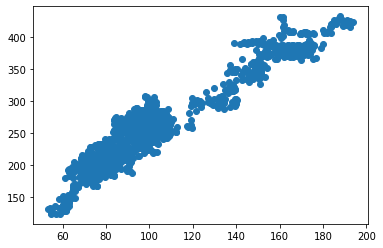

In [26]:
plt.figure()
plt.scatter(x, y)
plt.show()

In [27]:
class hypothesis(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0

    def predict(self, x):
        return self.b0 + self.b1 * x

    def error(self, X, Y):    
        return sum((self.predict(X) - Y)**2) / (2 * len(X)) 

    def BGD(self, X, Y, alpha=0.000005, accuracy=0.01, max_steps=5000):
      steps, errors = [], []
      step = 0        
      old_err = hyp.error(X, Y)
      new_err = hyp.error(X, Y) - 1
      dJ = 1
      while (dJ > accuracy) and (len(steps) < max_steps):
          dJ0 = sum(self.predict(X) - Y) /len(X)
          dJ1 = sum((self.predict(X) - Y) * X) /len(X)
          self.b0 -= alpha * dJ0
          self.b1 -= alpha * dJ1            
          old_err = new_err
          new_err = hyp.error(X, Y)
          dJ = abs(old_err - new_err) 
          step += 1            
          steps.append(step)
          errors.append(new_err)
      return steps, errors

In [28]:
hyp = hypothesis()
print(hyp.predict(0))
print(hyp.predict(100))
J = hyp.error(x, y)
print("initial error:", J)

0
0
initial error: 36271.58344889084


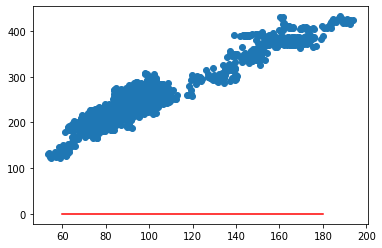

In [29]:
X0 = np.linspace(60, 180, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

error after gradient descent: 298.76881676471504


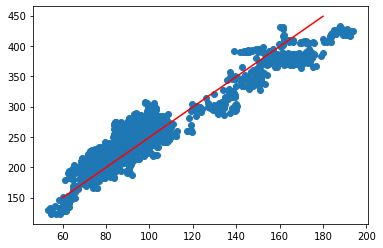

In [30]:
hyp.BGD(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)
X0 = np.linspace(60, 180, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

error after gradient descent: 298.76881676471504


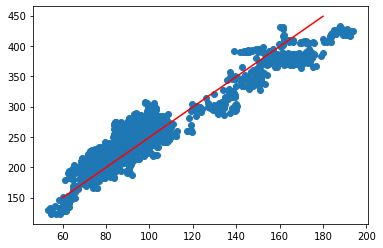

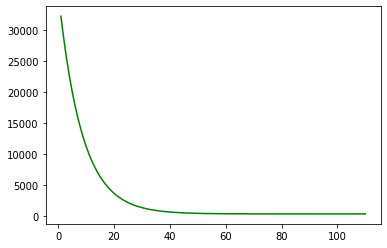

In [31]:
hyp = hypothesis()
steps, errors = hyp.BGD(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)

X0 = np.linspace(60, 180, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

plt.figure()
plt.plot(steps, errors, 'g')
plt.show()

### **Доп задания**

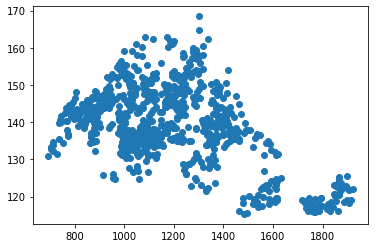

In [32]:
yndx = pd.read_csv('/content/YNDX_101001_171001.txt')
gazp = pd.read_csv('/content/GAZP_101001_171001.txt')

res2 = pd.merge(yndx, gazp, on="<DATE>")
x2 = res2['<CLOSE>_x']
y2 = res2['<CLOSE>_y']
plt.figure()
plt.scatter(x2, y2)
plt.show()

In [33]:
class hypothesis2(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
        
    def predict(self, x):
        return self.b0 + self.b1 * x
    
    def normalize(self, X):
        x_max = X.max()
        x_min = X.min()
        X = (X-x_min)/(x_max-x_min)
        return X, x_min, x_max-x_min
    
    def error(self, X, Y):    
        return sum((self.predict(X) - Y)**2) / (2 * len(X))
    
    def BGD(self, X, Y, alpha=0.000005, accuracy=0.01, max_steps=500, slowdown_step=10, slowdown=0.95, part=1/4, start_id=0):
        print(f'INIT BGD {start_id}')

        def_part_x = X.sample(frac=part).sort_index()
        def_part_y = Y[def_part_x.index]
        part_x, x_min, x_diff = self.normalize(def_part_x)
        part_y, y_min, y_diff = self.normalize(def_part_y)
        steps, errors, whole_err = [], [], []
        step = 0        

        new_err = self.error(part_x, part_y)
        dJ = np.inf
        while (dJ > accuracy) and (step<max_steps):
            alpha= alpha*slowdown if not step%slowdown_step else alpha
            dJ0 = sum(self.predict(part_x) - part_y) /len(part_x)
            dJ1 = sum((self.predict(part_x) - part_y) * part_x) /len(part_x)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            old_err = new_err
            new_err = self.error(part_x, part_y)
            if new_err > old_err:
                self.b0 = 0
                self.b1 = 0
                print(new_err, old_err, alpha, step)
                return self.BGD(
                    X,
                    Y,
                    alpha=alpha/10,
                    accuracy=accuracy,
                    max_steps=max_steps,
                    slowdown_step=slowdown_step,
                    slowdown=slowdown,
                    part=part,
                    start_id=start_id+1,
                )
    
            dJ = abs(old_err - new_err)
            step += 1            
            steps.append(step)
            errors.append(new_err)
            whole_err.append(self.error(X, Y))

        print(f'Step №{step}, old error: {old_err}, new error: {old_err}')

        return steps, errors, whole_err

INIT BGD 0
Step №4, old error: 0.07862475348355939, new error: 0.07862475348355939
error after gradient descent: 3609.7873311124677


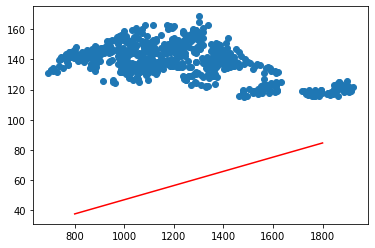

In [34]:
hyp2 = hypothesis2()
steps, errors, whole_err = hyp2.BGD(x2, y2, accuracy=0.01, alpha=0.1, max_steps=5000, slowdown=1, slowdown_step=100, part=1/100)
J = hyp2.error(x2, y2)
print("error after gradient descent:", J)
X02 = np.linspace(800, 1800, 100)
Y02 = hyp2.predict(X02)
plt.figure()
plt.scatter(x2, y2)
plt.plot(X02, Y02, 'r')
plt.show()

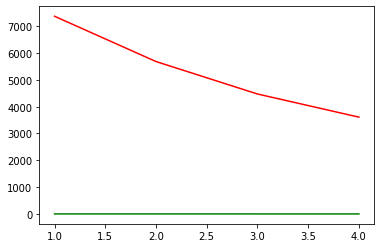

In [35]:
plt.figure()
plt.plot(steps, errors, 'g')
plt.plot(steps, whole_err, 'r')
plt.show()

### **SKLearn**

In [36]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [37]:
x3 = np.array(res2['<CLOSE>_x'])
y3 = np.array(res2['<CLOSE>_y'])

In [38]:
x3= x3.reshape((-1,1))
reg=linear_model.LinearRegression()
reg.fit(x3,y3)
print(reg.score(x3,y3))

0.24092152512857612


Коэффициенты: [-0.01888519]
Среднеквадратичная ошибка: 79.75122630693707
Коэффициент детерминации: 0.24092152512857612


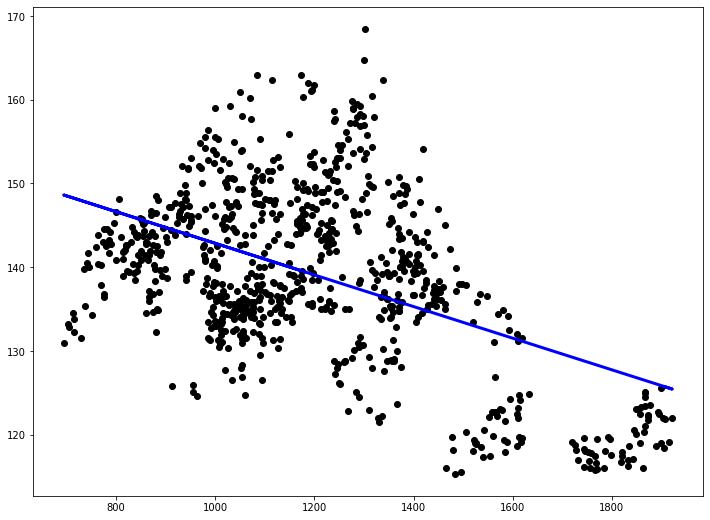

In [39]:
y_pred = reg.predict(x3)
y_pred = y_pred.reshape((-1, 1))
                        
print(f"Коэффициенты: {reg.coef_}")
print(f"Среднеквадратичная ошибка: {mean_squared_error(y3, y_pred)}")
print(f"Коэффициент детерминации: {r2_score(y3, y_pred)}")

plt.figure(figsize=(12, 9))
plt.scatter(x3, y3, color="black")
plt.plot(x3, y_pred, color="blue", linewidth=3)
plt.show()

In [40]:
x2.sample(frac=1/2)

210     942.0
656    1271.5
294     860.0
702    1311.0
364    1015.1
        ...  
627    1217.0
438    1018.0
144     991.0
29     1088.0
72     1176.8
Name: <CLOSE>_x, Length: 419, dtype: float64